In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import matplotlib.patches as mpatches
%matplotlib inline

In [3]:
df=pd.read_csv('D:/10Academy Train/Week2/AdSmartABdata.csv')
df.head(3)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,7/10/2020,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,7/7/2020,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,7/5/2020,2,E5823,6,Chrome Mobile WebView,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [56]:
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


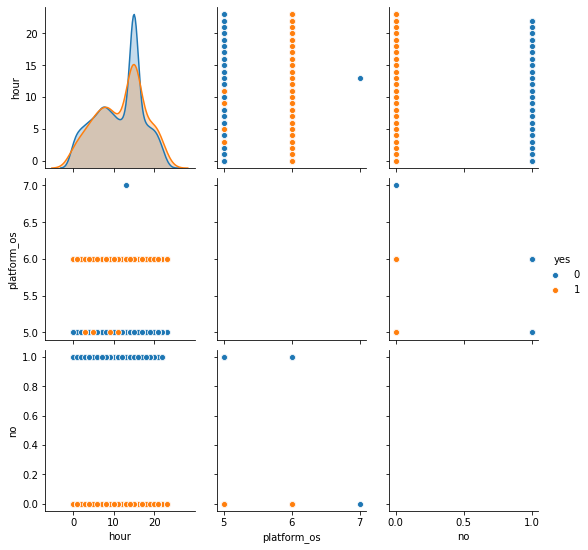

In [14]:
sns.pairplot(df, hue='yes')

In [73]:
# plotting functions
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    

def plot_dist(df:pd.DataFrame, column:str):
    plt.figure(figsize=(9,7))
    sns.distplot(df).set_title(f'Distribution of {column}')
    


def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
def plot_count2(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    plt.xticks(rotation=90)
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


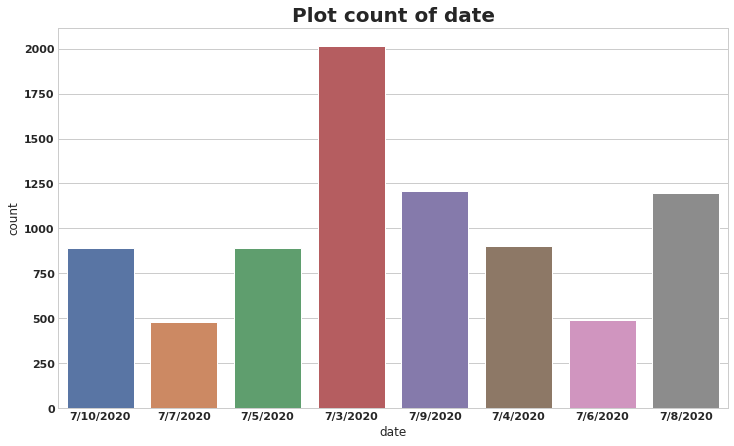

In [74]:
plot_count(df, 'date')

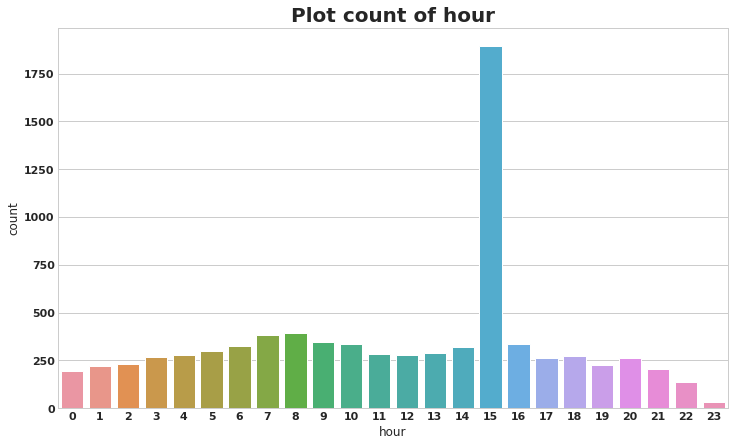

In [75]:
plot_count(df, 'hour')

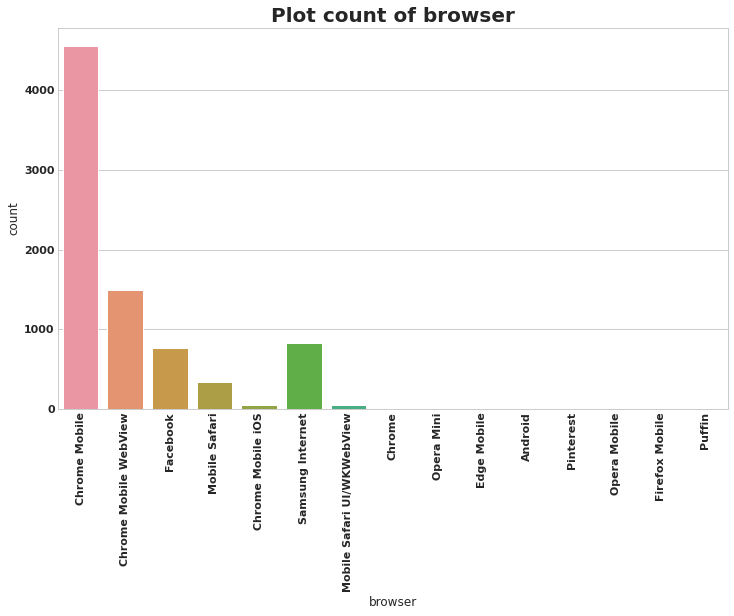

In [77]:
plot_count2(df,"browser")

In [24]:
df.groupby(['experiment'])

In [5]:
pd.crosstab(df['experiment'], df['yes'])

yes,0,1
experiment,,
control,3807,264
exposed,3698,308


In [6]:
pd.crosstab(df['experiment'], df['no'])

no,0,1
experiment,,
control,3749,322
exposed,3657,349


In [8]:
#check users sampled multiple times
session_counts = df['auction_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} users that appear multiple times in the dataset')


There are 0 users that appear multiple times in the dataset


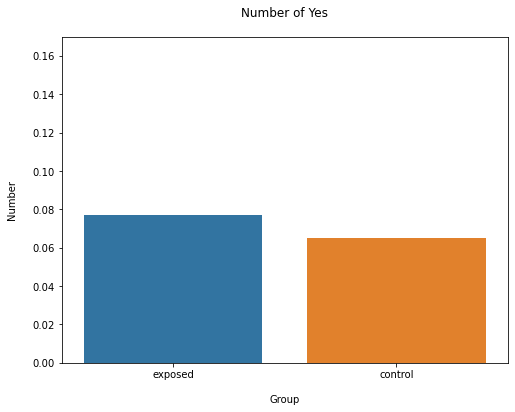

In [10]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['yes'], ci=False)

plt.ylim(0, 0.17)
plt.title('Number of Yes', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Number', labelpad=15);

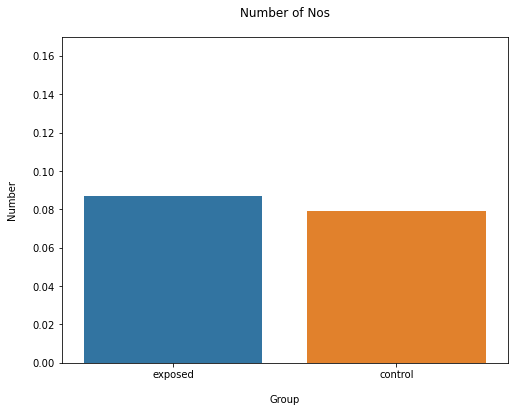

In [11]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['no'], ci=False)

plt.ylim(0, 0.17)
plt.title('Number of Nos', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Number', labelpad=15);

In [36]:
control= pd.DataFrame()
control['experiment']=df[df['experiment'] == control]
#print (df[df['experiment'== control]])

C:\Users\user\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [ ]:
#remove rows with 0 in both yes and no columns


In [45]:
#sample size
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
effect_size = sms.proportion_effectsize(0.01, 0.11)    # Calculating effect size based on our expected rates 10x

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

70


In [46]:
control_sample = df[df['experiment'] == 'control'].sample(n=required_n, random_state=22)
exposed_sample = df[df['experiment'] == 'exposed'].sample(n=required_n, random_state=22)

ab_test = pd.concat([control_sample, exposed_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
ab_test

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,e1d49107-f02f-4e09-8750-b22ae05d841d,control,7/6/2020,6,Generic Smartphone,6,Chrome Mobile,0,0
1,8b39c872-00f5-4278-9f0f-f8a096f4d076,control,7/9/2020,6,Generic Smartphone,6,Chrome Mobile,0,0
2,6d39d727-e406-4aee-acd9-6ce280018c73,control,7/4/2020,6,Generic Smartphone,6,Chrome Mobile,0,0
3,e44b9ba2-9a29-4477-a6ee-4913293a1a8b,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,0,0
4,9839dfb9-13ee-4361-85f6-7e132ce30396,control,7/3/2020,15,Samsung SM-G980F,6,Facebook,0,1
...,...,...,...,...,...,...,...,...,...
135,053943f2-6aed-4322-b27f-644d69abc3dc,exposed,7/8/2020,19,iPhone,5,Mobile Safari,0,0
136,7689354f-2db2-4fec-ae8e-e4cc4cfe946b,exposed,7/10/2020,5,Generic Smartphone,6,Chrome Mobile,0,0
137,1299fb97-e471-4879-a38a-ef768989f77d,exposed,7/10/2020,6,Generic Smartphone,6,Chrome Mobile,0,0
138,bb216311-8ca3-462c-af74-458961963915,exposed,7/9/2020,8,Generic Smartphone,6,Chrome Mobile,0,0


In [47]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   140 non-null    object
 1   experiment   140 non-null    object
 2   date         140 non-null    object
 3   hour         140 non-null    int64 
 4   device_make  140 non-null    object
 5   platform_os  140 non-null    int64 
 6   browser      140 non-null    object
 7   yes          140 non-null    int64 
 8   no           140 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 10.0+ KB


In [48]:
ab_test['experiment'].value_counts()

control    70
exposed    70
Name: experiment, dtype: int64

In [49]:
#check those clicked yes
conversion_rates = ab_test.groupby('experiment')['yes']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.014,0.119,0.014
exposed,0.057,0.232,0.028


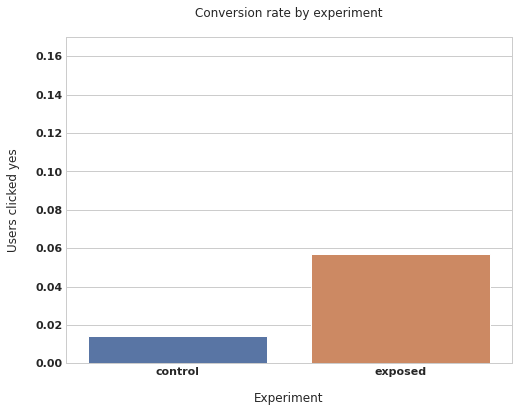

In [50]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['experiment'], y=ab_test['yes'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by experiment', pad=20)
plt.xlabel('Experiment', labelpad=15)
plt.ylabel('Users clicked yes', labelpad=15);

In [52]:
conversion_rates1 = ab_test.groupby('experiment')['no']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates1 = conversion_rates1.agg([np.mean, std_p, se_p])
conversion_rates1.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates1.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.057,0.232,0.028
exposed,0.043,0.203,0.024


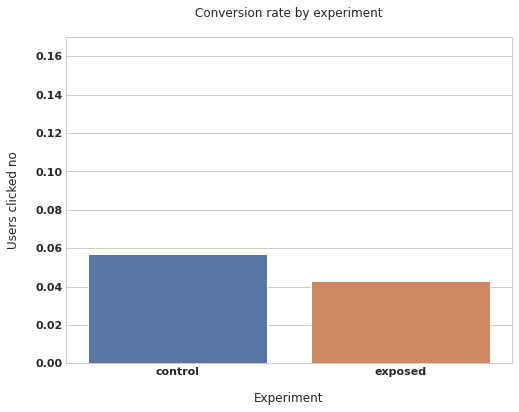

In [53]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['experiment'], y=ab_test['no'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by experiment', pad=20)
plt.xlabel('Experiment', labelpad=15)
plt.ylabel('Users clicked no', labelpad=15);

In [54]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ab_test[ab_test['experiment'] == 'control']['yes']
treatment_results = ab_test[ab_test['experiment'] == 'exposed']['yes']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for exposed group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -1.37
p-value: 0.172
ci 95% for control group: [0.000, 0.042]
ci 95% for exposed group: [0.003, 0.112]


In [55]:

control_results1 = ab_test[ab_test['experiment'] == 'control']['no']
exposed_results = ab_test[ab_test['experiment'] == 'exposed']['no']
n_con1 = control_results.count()
n_expose = treatment_results.count()
successes = [control_results.sum(), exposed_results.sum()]
nobs = [n_con1, n_expose]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_expose), (upper_con, upper_expose) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for exposed group: [{lower_expose:.3f}, {upper_expose:.3f}]')

z statistic: -1.01
p-value: 0.310
ci 95% for control group: [0.000, 0.042]
ci 95% for exposed group: [0.000, 0.090]


In [ ]:
###SEQUENTIAL TESTING

In [ ]:
def transform_data(df):
  
  #segment data into exposed and control groups
  df_by_year = df.groupby('experiment')
  #Zconsider that SmartAd runs the experment hourly, group data into hours. 
      #Hint: create new column to hold date+hour and use df.column.map(lambda x:  pd.Timestamp(x,tz=None).strftime('%Y-%m-%d:%H'))
  #create two dataframes with bernouli series 1 for posetive(yes) and 0 for negative(no)
    #Hint: Given engagement(sum of yes and no until current observation as an array) and success (yes countas an array), the method generates random binomial distribution
        #Example
          # engagement = np.array([5, 3, 3])
           #yes = np.array([2, 0, 3])       
         #Output is "[1] 1 0 1 0 0 0 0 0 1 1 1", showing a binary array of 5+3+3 values
         #of which 2 of the first 5 are ones, 0 of the next 3 are ones, and all 3 of
         #the last 3 are ones where position the ones is randomly distributed within each group.
  #'''
  return data_stream

In [57]:
#@title
#REFERENCE
# A Conditional Sequential Test for the Equality of Two Binomial Proportions
# William Q. Meeker, Jr
# Journal of the Royal Statistical Society. Series C (Applied Statistics)
# Vol. 30, No. 2 (1981), pp. 109-115
def ConditionalSPRT(self,x,y,t1,alpha=0.05,beta=0.10,stop=None):
        if t1<=1:
            printLog('warning',"Odd ratio should exceed 1.")
        if (alpha >0.5) | (beta >0.5):
            printLog('warning',"Unrealistic values of alpha or beta were passed."
                     +" You should have good reason to use large alpha & beta values")
        if stop!=None:
            stop=math.floor(n0)

        def comb(n, k):
            return factorial(n) // factorial(k) // factorial(n - k)
        
        def lchoose(b, j):
            a=[]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                if len(j)<2:
                    j=j[0]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                for k in j:
                    n=b
                    if (0 <= k) & (k<= n):
                        a.append(math.log(comb(n,k)))
                    else:
                        a.append(0)
            else:
                n=b
                k=j
                if (0 <= k) & (k<= n):
                    a.append(math.log(comb(n,k)))
                else:
                    a.append(0)

            return np.array(a)

        def g(x,r,n,t1,t0=1):
            return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

        def h(x,r,n,t=1):
            return f(r,n,t,offset=ftermlog(x,r,n,t))

        def f(r,n,t,offset=0):
            upper=max(0,r-n)
            lower=min(n,r)
            rng=list(range(upper,lower+1))
            return np.sum(fterm(rng,r,n,t,offset))

        def fterm(j,r,n,t,offset=0):
            ftlog=ftermlog(j,r,n,t,offset)
            return np.array([math.exp(ex) for ex in ftlog])

        def ftermlog(j,r,n,t,offset=0):
            xx=r-j
            lch=lchoose(n,j)
            lchdiff=lchoose(n,xx)
            lg=np.array(j)*math.log(t)
            lgsum=lch+lchdiff
            lgsum2=lgsum+lg
            lgdiff=lgsum2-offset

            return lgdiff

        def logf(r,n,t,offset=0):

            z=f(r,n,t,offset)
            if z>0:
                return math.log(z)
            else:
                return np.nan

        def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
            offset=ftermlog(math.ceil(r/2),r,n,t1c)
            z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
            a=-math.log(alpha/(1-beta))
            b=math.log(beta/(1-alpha))
            lower=b
            upper=1+a
            return (np.array([lower,upper])+z)/math.log(t1c/t0)
            
        l=math.log(beta/(1-alpha))
        u=-math.log(alpha/(1-beta))
        sample_size=min(len(x),len(y))
        n=np.array(range(1,sample_size+1))

        if stop!=None:
            n=np.array([z for z in n if z<=stop])
        x1=np.cumsum(x[n-1])
        r=x1+np.cumsum(y[n-1])
        stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g

        clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
        limits=[]
        for v in clu:
            inArray=[]
            for vin in v:
                inArray.append(math.floor(vin))
            limits.append(np.array(inArray))
        limits=np.array(limits)

        k=np.where((stats>=u) | (stats<=l))
        cvalues=stats[k]
        if cvalues.shape[0]<1:
            k= np.nan
            outcome='Unable to conclude.Needs more sample.'
        else:
            k=np.min(k)
            if stats[k]>=u:
                outcome=f'Exposed group produced a statistically significant increase.'
            else:
                outcome='Their is no statistically significant difference between two test groups'
        if (stop!=None) & (k==np.nan):
            c1=clowerUpper(r,stop,t1,alpha,beta)
            c1=math.floor(np.mean(c1)-0.5)
            if x1[n0]<=c1:
                truncate_decision='h0'
                outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
            else:
                truncate_decision='h1'
                outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
            truncated=stop
        else:
            truncate_decision='Non'
            truncated=np.nan
        return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)